In [89]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv('C:/Users/hongz/Downloads/choices13k-main/examp.csv')

# Check the first few rows to understand the structure of the data
df.head()

,v1,x_a_1,p_a_1,x_a_2,p_a_2,x_a_3,p_a_3,x_b_1,p_b_1,x_b_2,...,ln_scale_b,ave_ln_scale,ln_nstates_a,ln_nstates_b,ave_ln_nstates,abs_ev_diff,abs_ev_diff_sq,ln_var_a,ln_var_b,errors
0,0,26,0.95,-1.0,0.05,NaN,NaN,21.0,0.95,23.0,...,3.135494,2.904821,1.098612,1.098612,1.098612,3.55,12.602499,3.573118,0.173957,0.626667
1,1,14,0.60,-18.0,0.40,NaN,NaN,-5.0,0.75,8.0,...,2.014903,2.424058,1.098612,1.098612,1.098612,2.95,8.702501,5.508416,3.486993,0.493333
2,2,2,0.50,0.0,0.50,NaN,NaN,1.0,1.00,NaN,...,0.693147,0.693147,1.098612,0.693147,0.895880,0.00,0.000000,0.693147,0.000000,0.388235
3,3,37,0.05,8.0,0.95,NaN,NaN,-31.0,0.75,86.5,...,4.238926,3.697963,1.098612,1.386294,1.242453,10.95,119.902498,3.712291,7.867800,0.222222
4,4,26,1.00,NaN,NaN,NaN,NaN,-36.0,0.25,41.0,...,3.908684,3.602260,0.693147,1.945910,1.319529,1.25,1.562500,0.000000,7.150456,0.586667


## OPC

In [61]:
# Correct the code by defining gamma as the last two coefficients from the betas array
# assuming that the regression model has included the squared terms of the EV differences
# in the regression.

# Load the dataset again

# Define the feature columns and target variable
feature_cols = ['ln_cdf_diff_abs', 'nodom', 'not_gains_a', 'not_gains_b', 'ave_not_gains',
                'ln_scale_a', 'ln_scale_b', 'ave_ln_scale', 'ln_nstates_a', 'ln_nstates_b',
                'ave_ln_nstates', 'ln_var_a', 'ln_var_b','abs_ev_diff', 'abs_ev_diff_sq', ]

# Extract the target variable 'error' which represents ROC_EV
target = df['errors']

# Fit the regression model to get the beta coefficients
model = LinearRegression()
model.fit(df[feature_cols], target)

# Get the beta coefficients
beta_coeffs = model.coef_

# Assuming the last two betas are our gammas
gamma_1, gamma_2 = beta_coeffs[-2:]

# Correct the calculation of OPC by using the correct dimensions for beta coefficients
df['OPC'] = np.dot(df[feature_cols[:-2]].values, beta_coeffs[:-2]) + \
            beta_coeffs[-2] * df['abs_ev_diff'] + beta_coeffs[-1] * df['abs_ev_diff_sq']

# Show the first few rows of the dataframe with the calculated OPC
df[['OPC']].head()

,OPC
0,0.223746
1,0.252627
2,0.225246
3,0.260596
4,0.362518


In [98]:
# Correct the code by defining gamma as the last two coefficients from the betas array
# assuming that the regression model has included the squared terms of the EV differences
# in the regression.

# Load the dataset again

# Define the feature columns and target variable
feature_cols = [
    'ln_scale_a', 'ln_scale_b',	'ave_ln_scale',	'ln_nstates_a',	'ln_nstates_b',	'ave_ln_nstates', 'abs_ev_diff', 'abs_ev_diff_sq', 'ln_var_a','ln_var_b'
]

# Extract the target variable 'error' which represents ROC_EV
target = df['errors']

# Fit the regression model to get the beta coefficients
model = LinearRegression()
model.fit(df[feature_cols], target)

# Get the beta coefficients
beta_coeffs = model.coef_

# Assuming the last two betas are our gammas
gamma_1, gamma_2 = beta_coeffs[-2:]

# Correct the calculation of OPC by using the correct dimensions for beta coefficients
df['OPC'] = np.dot(df[feature_cols[:-2]].values, beta_coeffs[:-2]) + \
            beta_coeffs[-2] * df['abs_ev_diff'] + beta_coeffs[-1] * df['abs_ev_diff_sq']

# Show the first few rows of the dataframe with the calculated OPC
df[['OPC']].head()

,OPC
0,0.281621
1,0.186950
2,-0.006364
3,3.136511
4,0.064394


In [101]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df[target_col], test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict OPC on the test set
predicted_opc = model.predict(X_test)

# Calculate the explained variance
explained_variance_opc = explained_variance_score(y_test, predicted_opc)

print(f"The explained variance for OPC is: {explained_variance_opc}")

The explained variance for OPC is: 0.27142963081867166


In [100]:
df

,v1,x_a_1,p_a_1,x_a_2,p_a_2,x_a_3,p_a_3,x_b_1,p_b_1,x_b_2,...,ave_ln_scale,ln_nstates_a,ln_nstates_b,ave_ln_nstates,abs_ev_diff,abs_ev_diff_sq,ln_var_a,ln_var_b,errors,OPC
0,0,26,0.95,-1.0,0.05,NaN,NaN,21.0,0.95,23.0,...,2.904821,1.098612,1.098612,1.098612,3.550000,12.602499,3.573118,0.173957,0.626667,0.281621
1,1,14,0.60,-18.0,0.40,NaN,NaN,-5.0,0.75,8.0,...,2.424058,1.098612,1.098612,1.098612,2.950000,8.702501,5.508416,3.486993,0.493333,0.186950
2,2,2,0.50,0.0,0.50,NaN,NaN,1.0,1.00,NaN,...,0.693147,1.098612,0.693147,0.895880,0.000000,0.000000,0.693147,0.000000,0.388235,-0.006364
3,3,37,0.05,8.0,0.95,NaN,NaN,-31.0,0.75,86.5,...,3.697963,1.098612,1.386294,1.242453,10.950000,119.902498,3.712291,7.867800,0.222222,3.136511
4,4,26,1.00,NaN,NaN,NaN,NaN,-36.0,0.25,41.0,...,3.602260,0.693147,1.945910,1.319529,1.250000,1.562500,0.000000,7.150456,0.586667,0.064394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14563,14563,30,1.00,NaN,NaN,NaN,NaN,0.0,0.20,42.0,...,3.262515,0.693147,1.098612,0.895880,3.600001,12.960004,0.000000,5.646295,0.632381,0.304644
14564,14564,70,0.50,-42.0,0.50,NaN,NaN,7.0,0.20,18.0,...,3.322870,1.098612,1.098612,1.098612,1.800000,3.240001,8.051022,3.013572,0.240000,0.072567
14565,14565,8,0.40,-17.0,0.60,NaN,NaN,-34.0,0.60,28.5,...,3.040865,1.098612,2.079442,1.589027,1.000000,1.000001,5.017280,6.923136,0.666667,0.032685
14566,14566,89,0.50,-49.0,0.50,NaN,NaN,-12.0,0.50,45.0,...,3.816443,1.098612,1.098612,1.098612,3.500000,12.250000,8.468423,6.701039,0.386667,0.285939


In [99]:
beta_coeffs

array([ 2.04267708e+06,  2.04267708e+06, -4.08535415e+06, -6.14614528e+06,
       -6.14614525e+06,  1.22922905e+07, -4.06336249e-02,  1.75115267e-03,
        1.19993988e-02,  2.66864892e-02])

## OAC

In [62]:
selection = pd.read_csv('C:/Users/hongz/Downloads/choices13k-main/c13k_selections.csv')
pa = 1 - selection['bRate']

df['s'] = (df['EV_B'] - df['EV_A'])/ np.log((1/pa)-1)
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=feature_cols + ['s'])

# Now fit the model using the filtered dataframe
model = LinearRegression()
model.fit(df[feature_cols], df['s'])

# Get the beta coefficients
beta_coeffs = model.coef_
#beta_coeffs

df['OAC'] = np.dot(df[feature_cols].values, beta_coeffs)
df

C:\Users\hongz\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,v1,x_a_1,p_a_1,x_a_2,p_a_2,x_a_3,p_a_3,x_b_1,p_b_1,x_b_2,...,abs_ev_diff,abs_ev_diff_sq,ln_var_a,ln_var_b,EV_A,EV_B,errors,OPC,s,OAC
0,0,26,0.95,-1.0,0.05,NaN,NaN,21.0,0.95,23.0,...,3.550000,12.602499,3.573118,0.173957,24.65,21.10,0.626667,0.223746,-6.854035,-1.793825e+13
1,1,14,0.60,-18.0,0.40,NaN,NaN,-5.0,0.75,8.0,...,2.950000,8.702501,5.508416,3.486993,1.20,-1.75,0.493333,0.252627,110.618444,-1.751284e+13
2,2,2,0.50,0.0,0.50,NaN,NaN,1.0,1.00,NaN,...,0.000000,0.000000,0.693147,0.000000,1.00,1.00,0.388235,0.225246,0.000000,-5.297778e+12
3,3,37,0.05,8.0,0.95,NaN,NaN,-31.0,0.75,86.5,...,10.950000,119.902498,3.712291,7.867800,9.45,-1.50,0.222222,0.260596,8.740680,-2.521007e+13
4,4,26,1.00,NaN,NaN,NaN,NaN,-36.0,0.25,41.0,...,1.250000,1.562500,0.000000,7.150456,26.00,24.75,0.586667,0.362518,-3.569364,-2.197364e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14563,14563,30,1.00,NaN,NaN,NaN,NaN,0.0,0.20,42.0,...,3.600001,12.960004,0.000000,5.646295,30.00,33.60,0.632381,0.252512,-6.636620,-8.648003e+12
14564,14564,70,0.50,-42.0,0.50,NaN,NaN,7.0,0.20,18.0,...,1.800000,3.240001,8.051022,3.013572,14.00,15.80,0.240000,0.336355,1.561579,-7.894591e+12
14565,14565,8,0.40,-17.0,0.60,NaN,NaN,-34.0,0.60,28.5,...,1.000000,1.000001,5.017280,6.923136,-7.00,-8.00,0.666667,0.339542,-1.442695,-1.815454e+13
14566,14566,89,0.50,-49.0,0.50,NaN,NaN,-12.0,0.50,45.0,...,3.500000,12.250000,8.468423,6.701039,20.00,16.50,0.386667,0.306755,7.586504,-1.623494e+13


## OLC

In [63]:
import pandas as pd
import numpy as np

def adjust_error_rate(error_rate):
    epsilon = 1e-6
    return np.clip(error_rate, epsilon, 1 - epsilon)

def compute_implied_logit_precision(error_rate):
    adjusted_error_rate = adjust_error_rate(error_rate)
    return 1 / np.log((1 - adjusted_error_rate) / adjusted_error_rate)


# Compute the implied logit precision
df['implied_logit_precision'] = df['errors'].apply(compute_implied_logit_precision)

# # Estimate η0 and η1 parameters (placeholders here)
# eta_0 = 1
# eta_1 = 1

# # Calculate the precision ηC,D
# df['eta_C_D'] = eta_0 + eta_1 / df['implied_logit_precision']

# Calculate the OAC
#df['OAC'] = 1 / df['eta_C_D']
df['s'] = (df['EV_B'] - df['EV_A'])/ df['implied_logit_precision']

# Check the results
#print(df[['implied_logit_precision', 'eta_C_D', 'OAC']].head())


In [64]:
feature_cols = ['ln_cdf_diff_abs', 'nodom', 'not_gains_a', 'not_gains_b', 'ave_not_gains',
                'ln_scale_a', 'ln_scale_b', 'ave_ln_scale', 'ln_nstates_a', 'ln_nstates_b',
                'ave_ln_nstates', 'ln_var_a', 'ln_var_b' ]

# Now fit the model using the filtered dataframe
model = LinearRegression()
model.fit(df[feature_cols], df['s'])

# Get the beta coefficients
beta_coeffs = model.coef_
#beta_coeffs

df['OAC'] = np.dot(df[feature_cols].values, beta_coeffs)
df

,v1,x_a_1,p_a_1,x_a_2,p_a_2,x_a_3,p_a_3,x_b_1,p_b_1,x_b_2,...,ln_var_a,ln_var_b,EV_A,EV_B,errors,OPC,s,OAC,implied_logit_precision,eta_C_D
0,0,26,0.95,-1.0,0.05,NaN,NaN,21.0,0.95,23.0,...,3.573118,0.173957,24.65,21.10,0.626667,0.223746,1.838698,4.616253,-1.930714,0.482057
1,1,14,0.60,-18.0,0.40,NaN,NaN,-5.0,0.75,8.0,...,5.508416,3.486993,1.20,-1.75,0.493333,0.252627,-0.078671,-2.649392,37.497776,1.026668
2,2,2,0.50,0.0,0.50,NaN,NaN,1.0,1.00,NaN,...,0.693147,0.000000,1.00,1.00,0.388235,0.225246,0.000000,-1.967830,2.199077,1.454736
3,3,37,0.05,8.0,0.95,NaN,NaN,-31.0,0.75,86.5,...,3.712291,7.867800,9.45,-1.50,0.222222,0.260596,-13.717755,-2.944572,0.798236,2.252763
4,4,26,1.00,NaN,NaN,NaN,NaN,-36.0,0.25,41.0,...,0.000000,7.150456,26.00,24.75,0.586667,0.362518,0.437753,-3.151061,-2.855491,0.649798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14563,14563,30,1.00,NaN,NaN,NaN,NaN,0.0,0.20,42.0,...,0.000000,5.646295,30.00,33.60,0.632381,0.252512,-1.952801,-0.076617,-1.843506,0.457555
14564,14564,70,0.50,-42.0,0.50,NaN,NaN,7.0,0.20,18.0,...,8.051022,3.013572,14.00,15.80,0.240000,0.336355,2.074823,2.138655,0.867544,2.152680
14565,14565,8,0.40,-17.0,0.60,NaN,NaN,-34.0,0.60,28.5,...,5.017280,6.923136,-7.00,-8.00,0.666667,0.339542,0.693147,1.826294,-1.442695,0.306853
14566,14566,89,0.50,-49.0,0.50,NaN,NaN,-12.0,0.50,45.0,...,8.468423,6.701039,20.00,16.50,0.386667,0.306755,-1.614709,-1.584777,2.167573,1.461346


In [65]:
from sklearn.linear_model import LinearRegression

# Selecting the relevant features for the regression
features = [ 'not_gains_a', 'ave_not_gains',
            'ln_scale_a', 'ave_ln_scale', 'ln_nstates_a', 
            'ave_ln_nstates', 'ln_var_a']
X = df[features]
y = df['errors']

# Fitting the linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Calculate the predicted s_EV_A,B using the regression model
df['predicted_s_EV_A,B'] = regression_model.predict(X)

# Now we'll calculate the OLC using the given formula
# The scale parameter s_C is the error rate, which is 'errors' in the dataframe
df['OLC_C'] = df['predicted_s_EV_A,B'] / df['errors'] - X.dot(regression_model.coef_)

# Display the first few rows of the dataframe to verify the results
df[['predicted_s_EV_A,B', 'OLC_C']].head()


,"predicted_s_EV_A,B",OLC_C
0,0.344417,0.342113
1,0.368022,0.514897
2,0.169854,0.404577
3,0.479413,1.814875
4,0.424610,0.436086


In [66]:
# Calculate s_EV_A,B using the given EV_A and EV_B variables
df['s_EV_A,B'] = df['EV_B'] - df['EV_A']

# Calculate OLC_C using the provided s_EV_A,B and the error rate (s_C)
df['OLC'] = df['s_EV_A,B'] / df['errors'] - X.dot(regression_model.coef_)

# Display the first few rows of the dataframe to verify the updated OLC_C values
df[['s_EV_A,B', 'OLC_C']].head()


,"s_EV_A,B",OLC_C
0,-3.55,0.342113
1,-2.95,0.514897
2,0.00,0.404577
3,-10.95,1.814875
4,-1.25,0.436086


In [67]:
df

,v1,x_a_1,p_a_1,x_a_2,p_a_2,x_a_3,p_a_3,x_b_1,p_b_1,x_b_2,...,errors,OPC,s,OAC,implied_logit_precision,eta_C_D,"predicted_s_EV_A,B",OLC_C,"s_EV_A,B",OLC
0,0,26,0.95,-1.0,0.05,NaN,NaN,21.0,0.95,23.0,...,0.626667,0.223746,1.838698,4.616253,-1.930714,0.482057,0.344417,0.342113,-3.55,-5.872382
1,1,14,0.60,-18.0,0.40,NaN,NaN,-5.0,0.75,8.0,...,0.493333,0.252627,-0.078671,-2.649392,37.497776,1.026668,0.368022,0.514897,-2.95,-6.210823
2,2,2,0.50,0.0,0.50,NaN,NaN,1.0,1.00,NaN,...,0.388235,0.225246,0.000000,-1.967830,2.199077,1.454736,0.169854,0.404577,0.00,-0.032925
3,3,37,0.05,8.0,0.95,NaN,NaN,-31.0,0.75,86.5,...,0.222222,0.260596,-13.717755,-2.944572,0.798236,2.252763,0.479413,1.814875,-10.95,-49.617484
4,4,26,1.00,NaN,NaN,NaN,NaN,-36.0,0.25,41.0,...,0.586667,0.362518,0.437753,-3.151061,-2.855491,0.649798,0.424610,0.436086,-1.25,-2.418363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14563,14563,30,1.00,NaN,NaN,NaN,NaN,0.0,0.20,42.0,...,0.632381,0.252512,-1.952801,-0.076617,-1.843506,0.457555,0.318866,0.322294,3.60,5.510834
14564,14564,70,0.50,-42.0,0.50,NaN,NaN,7.0,0.20,18.0,...,0.240000,0.336355,2.074823,2.138655,0.867544,2.152680,0.381987,1.346554,1.80,7.254942
14565,14565,8,0.40,-17.0,0.60,NaN,NaN,-34.0,0.60,28.5,...,0.666667,0.339542,0.693147,1.826294,-1.442695,0.306853,0.443908,0.358883,-1.00,-1.806980
14566,14566,89,0.50,-49.0,0.50,NaN,NaN,-12.0,0.50,45.0,...,0.386667,0.306755,-1.614709,-1.584777,2.167573,1.461346,0.489954,0.914097,-3.50,-9.404749


In [68]:
df.to_csv('C:/Users/hongz/Downloads/choices13k-main/itit.csv')

In [71]:
# Load the data
df = pd.read_csv('C:/Users/hongz/Downloads/choices13k-main/index_calculated_stata.csv')
df

,x_a_1,x_a_2,p_a_1,p_a_2,x_b_1,x_b_2,x_b_3,x_b_4,x_b_5,x_b_6,...,ln_excess_dissimilarity,ln_payout_magn_a,ln_num_states_a,involves_loss_a,ln_variance_a,ln_payout_magn_b,ln_num_states_b,involves_loss_b,ln_variance_b,v1
0,26,-1.0,0.95,0.05,21.0,23.0,NaN,NaN,NaN,NaN,...,1.163151,2.674149,1.098612,1,3.573118,3.135494,1.098612,0,0.173957,0
1,14,-18.0,0.60,0.40,-5.0,8.0,NaN,NaN,NaN,NaN,...,2.433613,2.833213,1.098612,1,5.508416,2.014903,1.098612,1,3.486993,1
2,2,0.0,0.50,0.50,1.0,NaN,NaN,NaN,NaN,NaN,...,0.693147,0.693147,1.098612,0,0.693147,0.693147,0.693147,0,0.000000,2
3,37,8.0,0.05,0.95,-31.0,86.5,87.5,NaN,NaN,NaN,...,3.627004,3.157000,1.098612,0,3.712291,4.238926,1.386294,1,7.867800,3
4,26,NaN,1.00,NaN,-36.0,41.0,43.0,47.0,55.0,71.0,...,3.383644,3.295837,0.693147,0,0.000000,3.908684,1.945910,1,7.150456,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14563,30,NaN,1.00,NaN,0.0,42.0,NaN,NaN,NaN,NaN,...,2.564949,3.433987,0.693147,0,0.000000,3.091042,1.098612,0,5.646295,14563
14564,70,-42.0,0.50,0.50,7.0,18.0,NaN,NaN,NaN,NaN,...,3.970292,4.043051,1.098612,1,8.051022,2.602690,1.098612,0,3.013572,14564
14565,8,-17.0,0.40,0.60,-34.0,28.5,29.5,30.5,31.5,32.5,...,2.965015,2.602690,1.098612,1,5.017280,3.479040,2.079442,1,6.923136,14565
14566,89,-49.0,0.50,0.50,-12.0,45.0,NaN,NaN,NaN,NaN,...,3.637586,4.248495,1.098612,1,8.468423,3.384390,1.098612,1,6.701039,14566


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

feature_cols = [
    'abs_ev_diff', 'abs_ev_diff_sq', 'ave_ln_payout_magn', 
    'ave_ln_num_states', 'no_dominance', 'frac_involves_losses', 
    'ln_excess_dissimilarity', 'ln_payout_magn_a', 'ln_num_states_a', 
    'involves_loss_a', 'ln_variance_a', 'ln_payout_magn_b', 
    'ln_num_states_b', 'involves_loss_b', 'ln_variance_b'
]

# Fit the model for OPC
model_opc = LinearRegression()
model_opc.fit(df[feature_cols], df['OPC'])
predictions_opc = model_opc.predict(df[feature_cols])
r_squared_opc = r2_score(df['OPC'], predictions_opc)
r_squared_opc
# Repeat for OAC and OLC...

# Now, r_squared_opc is your explained variance for OPC.
# Do similar steps for OAC and OLC using their respective feature sets and target variables.


0.9951816014599398

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score

# Assuming 'df' is your DataFrame containing the features and the OPC values
# Define your feature columns and target column
feature_cols = [
    'ln_scale_a', 'ln_scale_b',	'ave_ln_scale',	'ln_nstates_a',	'ln_nstates_b',	'ave_ln_nstates', 'abs_ev_diff', 'abs_ev_diff_sq', 'ln_var_a','ln_var_b'
]
target_col = 'errors'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df[target_col], test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict OPC on the test set
predicted_opc = model.predict(X_test)

# Calculate the explained variance
explained_variance_opc = explained_variance_score(y_test, predicted_opc)

print(f"The explained variance for OPC is: {explained_variance_opc}")

The explained variance for OPC is: 0.27142963081867166


In [93]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test,  predicted_opc)
r_squared

0.2713458582329935

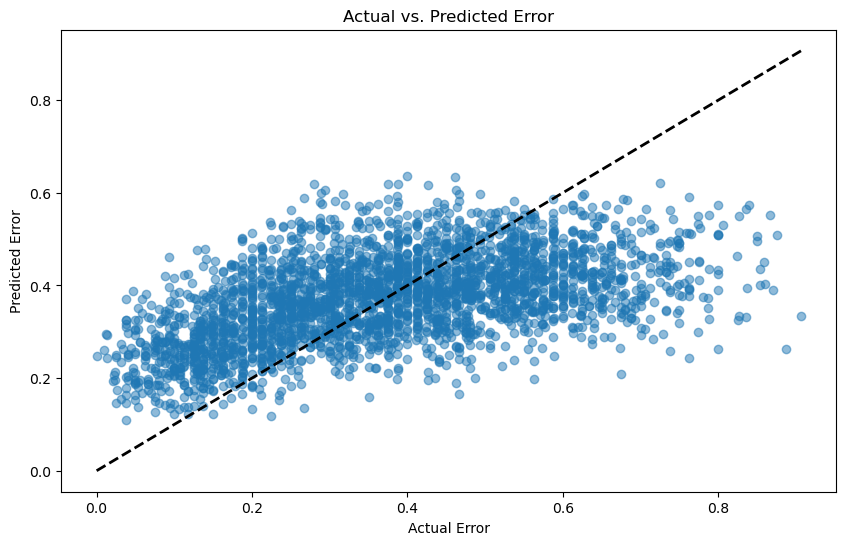

In [95]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted OPC values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_opc, alpha=0.5)
plt.title('Actual vs. Predicted Error')
plt.xlabel('Actual Error')
plt.ylabel('Predicted Error')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()
